In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [94]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [95]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 300


In [96]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   chinese                                               1133 non-null   object
 1   english                                               1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                      1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01   1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01       1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03                1133 non-null   object
 8   internlm/internlm2_5-7b-chat/epochs-04                1133 non-null 

In [97]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10']

In [98]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10'],
 ['chinese',
  'english',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   chinese                                               1133 non-null   object
 1   english                                               1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00  1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02  1133 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04  1133 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06  1133 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08  1133 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10  1133 non-null   object
dtypes: object(8)
memory usage: 70.9+ KB


In [100]:
variant = "rpp"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['internlm/internlm2_5-7b-chat']
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00: {'meteor': 0.4154012641245894, 'bleu_scores': {'bleu': 0.14309137236355685, 'precisions': [0.4973887375113533, 0.21319837096200228, 0.1108075665383501, 0.06309435928611751], 'brevity_penalty': 0.867168519957502, 'length_ratio': 0.875256707519046, 'translation_length': 26424, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45963264129552006, 'rouge2': 0.21811689239370904, 'rougeL': 0.4066285770868837, 'rougeLsum': 0.4062445710605465}, 'accuracy': 0.01059135039717564, 'correct_ids': [41, 77, 240, 309, 348, 533, 658, 659, 712, 778, 893, 1011]}
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02: {'meteor': 0.41563517521112475, 'bleu_scores': {'bleu': 0.142638385938671, 'precisions': [0.5002695417789758, 0.2158473245561058, 0.11347338226609298, 0.06471187491695088], 'brevity_penalty': 0.8500201815718359, 'length_ratio': 0.8602186154355747, 'translation_length': 25970, 'reference_length': 30190}

model   rpp    meteor    bleu_1   rouge_l  \
0  internlm/internlm2_5-7b-chat  1.00  0.415401  0.143091  0.406629   
1  internlm/internlm2_5-7b-chat  1.02  0.415635  0.142638  0.404423   
2  internlm/internlm2_5-7b-chat  1.04  0.409120  0.132664  0.395907   
3  internlm/internlm2_5-7b-chat  1.06  0.396687  0.124850  0.380221   
4  internlm/internlm2_5-7b-chat  1.08  0.380986  0.112479  0.364056   
5  internlm/internlm2_5-7b-chat  1.10  0.365019  0.099618  0.348367   

   ews_score  repetition_score  total_repetitions       rap  \
0        0.0          0.856134           0.856134  0.401092   
1        0.0          1.220653           1.220653  0.395836   
2        0.0          0.853486           0.853486  0.395068   
3        0.0          0.840247           0.840247  0.383258   
4        0.0          0.857017           0.857017  0.367850   
5        0.0          0.834951           0.834951  0.352734   

   num_max_output_tokens  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
5                      1

In [104]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp.txt
Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt


model   rpp  eval_time
0  internlm/internlm2_5-7b-chat  1.00   2.884378
1  internlm/internlm2_5-7b-chat  1.02   2.895852
2  internlm/internlm2_5-7b-chat  1.04   2.893204
3  internlm/internlm2_5-7b-chat  1.06   2.901147
4  internlm/internlm2_5-7b-chat  1.08   2.933804
5  internlm/internlm2_5-7b-chat  1.10   2.986761

In [105]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model   rpp    meteor    bleu_1   rouge_l  \
0  internlm/internlm2_5-7b-chat  1.00  0.415401  0.143091  0.406629   
1  internlm/internlm2_5-7b-chat  1.02  0.415635  0.142638  0.404423   
2  internlm/internlm2_5-7b-chat  1.04  0.409120  0.132664  0.395907   
3  internlm/internlm2_5-7b-chat  1.06  0.396687  0.124850  0.380221   
4  internlm/internlm2_5-7b-chat  1.08  0.380986  0.112479  0.364056   
5  internlm/internlm2_5-7b-chat  1.10  0.365019  0.099618  0.348367   

   ews_score  repetition_score  total_repetitions       rap  \
0        0.0          0.856134           0.856134  0.401092   
1        0.0          1.220653           1.220653  0.395836   
2        0.0          0.853486           0.853486  0.395068   
3        0.0          0.840247           0.840247  0.383258   
4        0.0          0.857017           0.857017  0.367850   
5        0.0          0.834951           0.834951  0.352734   

   num_max_output_tokens  eval_time  
0                      1   2.884378  
1                      1   2.895852  
2                      1   2.893204  
3                      1   2.901147  
4                      1   2.933804  
5                      1   2.986761

In [106]:
models = metrics_df["model"].unique()
models

array(['internlm/internlm2_5-7b-chat'], dtype=object)

In [107]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [108]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [109]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Epoch (0: Base, 1-6: Fine-tuned)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.5 if len(columns) > 1 else -0.32),
    )

    plt.show()

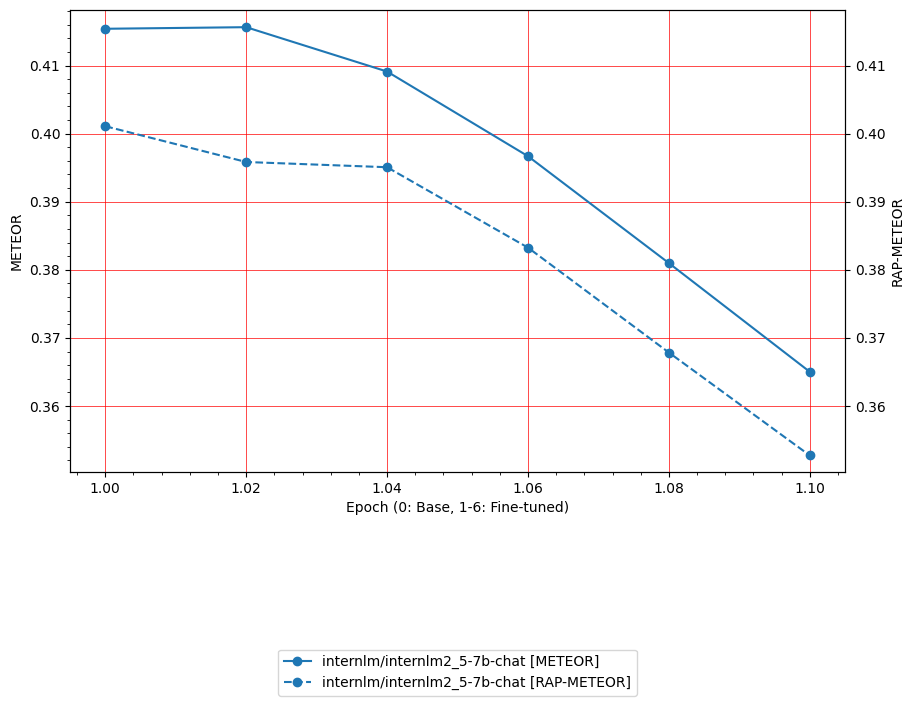

In [110]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

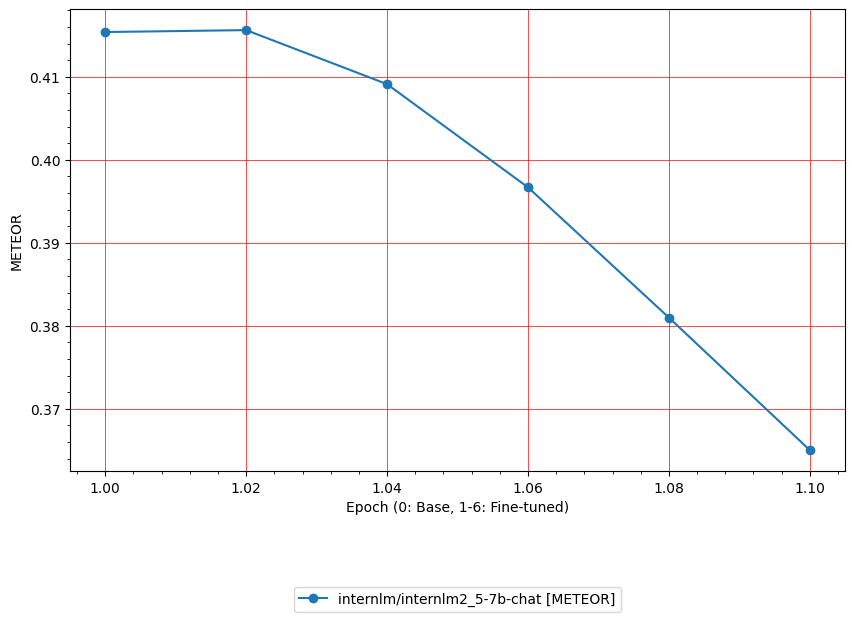

In [111]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

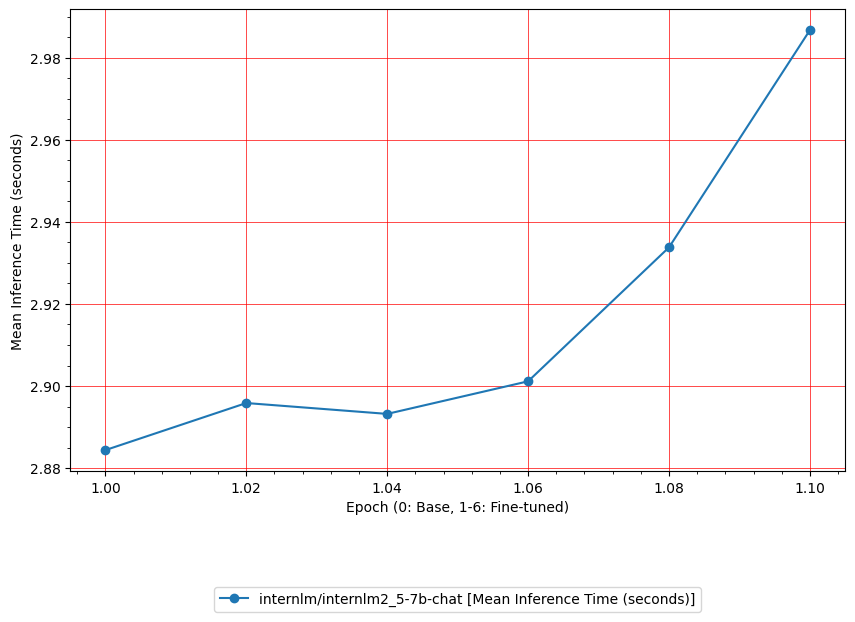

In [112]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
)

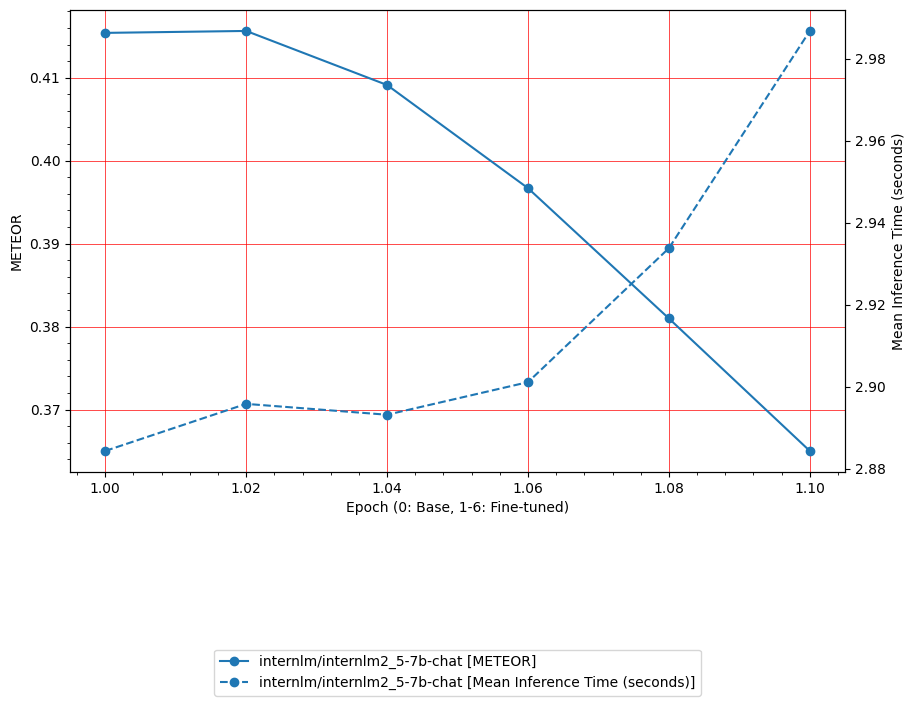

In [113]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
)

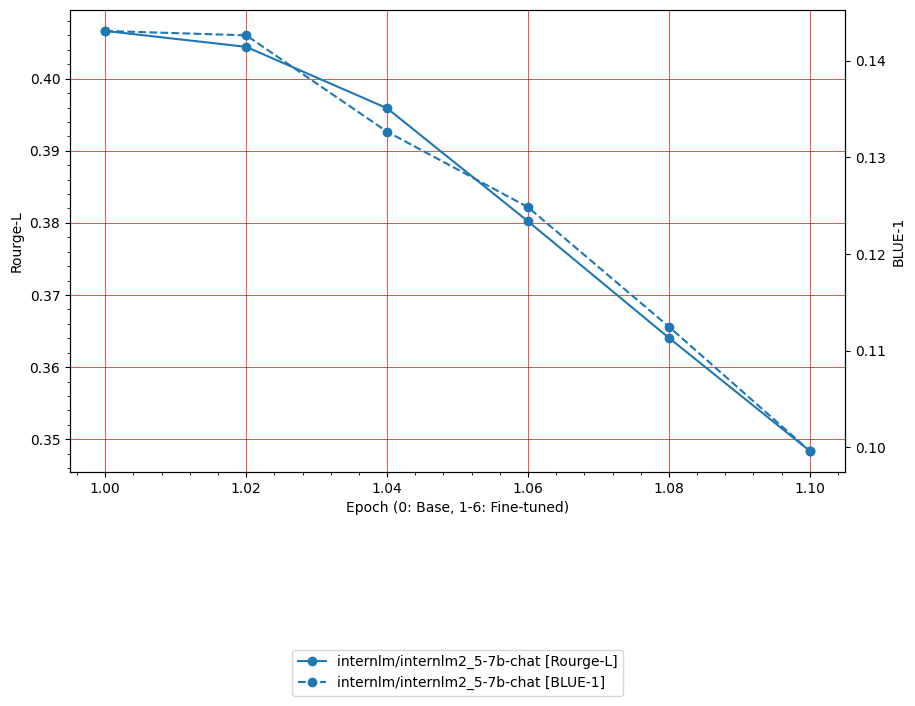

In [114]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

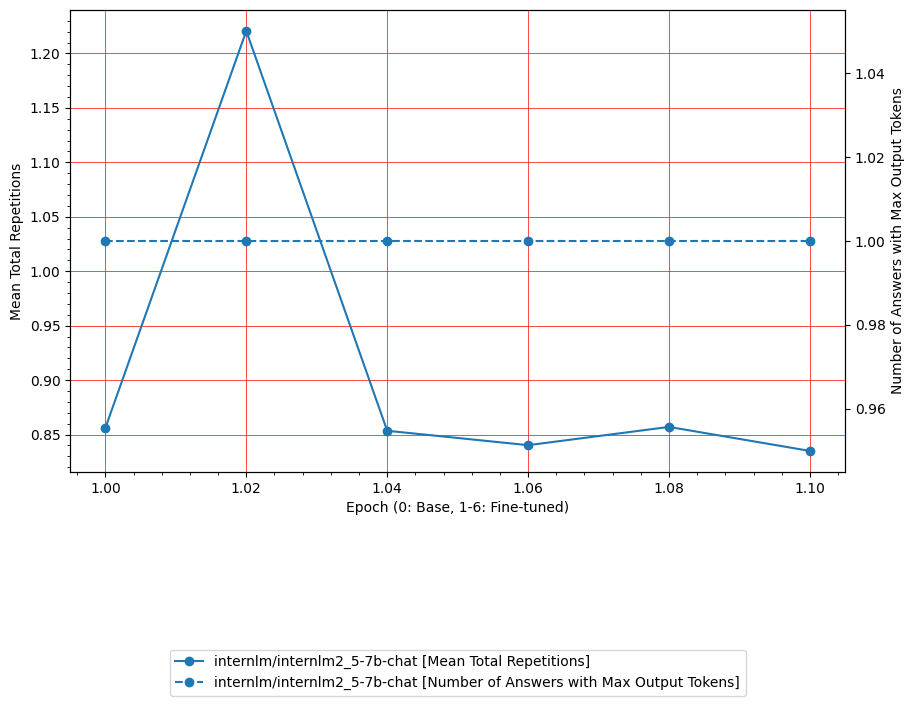

In [115]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

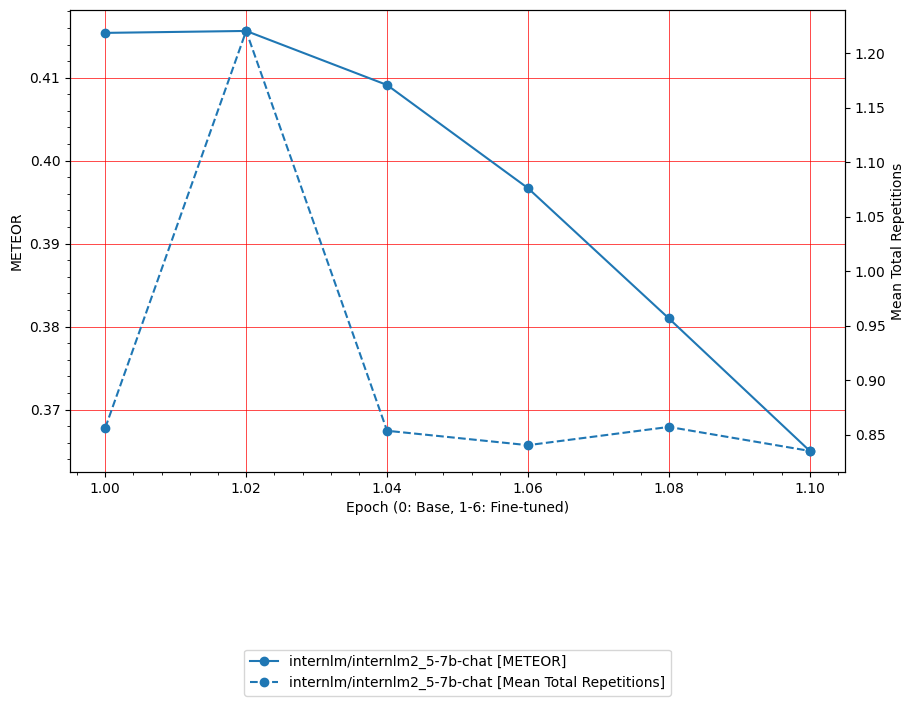

In [116]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

In [117]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
*** Found 1 rows with total_repetitions > 50 for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
Short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, short, long, sho

In [118]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [119]:
metrics_df.describe()

meteor    bleu_1   rouge_l  ews_score  repetition_score  \
count  6.000000  6.000000  6.000000        6.0          6.000000   
mean   0.397141  0.125890  0.383267        0.0          0.910415   
std    0.020552  0.017282  0.023450        0.0          0.152253   
min    0.365019  0.099618  0.348367        0.0          0.834951   
25%    0.384911  0.115571  0.368097        0.0          0.843557   
50%    0.402904  0.128757  0.388064        0.0          0.854810   
75%    0.413831  0.140145  0.402294        0.0          0.856796   
max    0.415635  0.143091  0.406629        0.0          1.220653   

       total_repetitions       rap  num_max_output_tokens  eval_time  
count           6.000000  6.000000                    6.0   6.000000  
mean            0.910415  0.382640                    1.0   2.915858  
std             0.152253  0.018882                    0.0   0.038653  
min             0.834951  0.352734                    1.0   2.884378  
25%             0.843557  0.371702                    1.0   2.893866  
50%             0.854810  0.389163                    1.0   2.898500  
75%             0.856796  0.395644                    1.0   2.925640  
max             1.220653  0.401092                    1.0   2.986761